In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# make plots show inside notebook
%matplotlib inline

In [ ]:
# load full dataset or sample if it's too large
df = pd.read_csv("metadata.csv")

# check first rows
df.head()


In [ ]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum().head(20))  # check first 20 columns


In [ ]:
# convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# extract year
df['year'] = df['publish_time'].dt.year

# add abstract word count
df['abstract_word_count'] = df['abstract'].fillna("").apply(lambda x: len(x.split()))


In [ ]:
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=year_counts.index, y=year_counts.values, color="skyblue")
plt.title("Publications by Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()


In [ ]:
top_journals = df['journal'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_journals.values, y=top_journals.index, palette="viridis")
plt.title("Top Journals Publishing COVID-19 Research")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()


In [ ]:
# combine all titles
text = " ".join(str(title) for title in df['title'].dropna())

# generate wordcloud
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_19800\3842954963.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.values, y=source_counts.index, palette="magma")


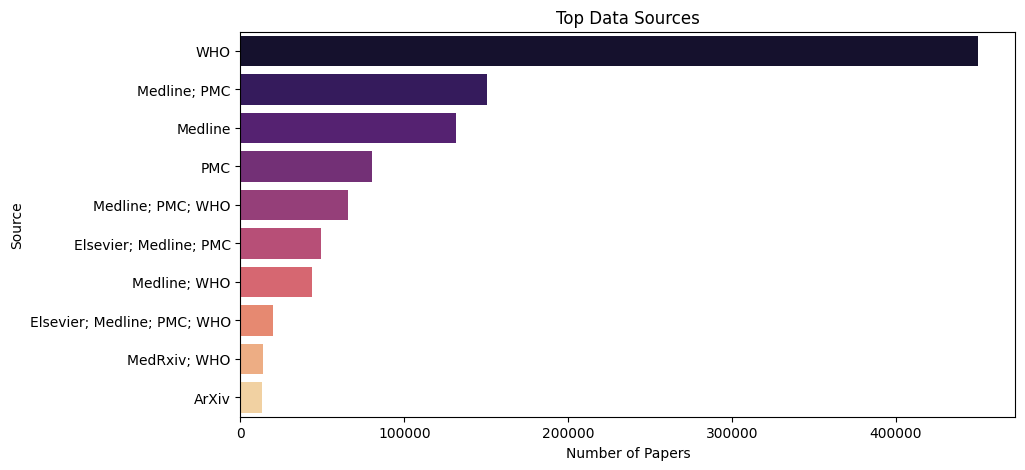

In [3]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=source_counts.values,
    y=source_counts.index,
    hue=source_counts.index,   # add this line to fix the warning
    palette="magma",
    legend=False               # suppress duplicate legend
)
plt.title("Distribution by Source")
plt.xlabel("Count")
plt.ylabel("Source")
plt.show()
